# Exercise
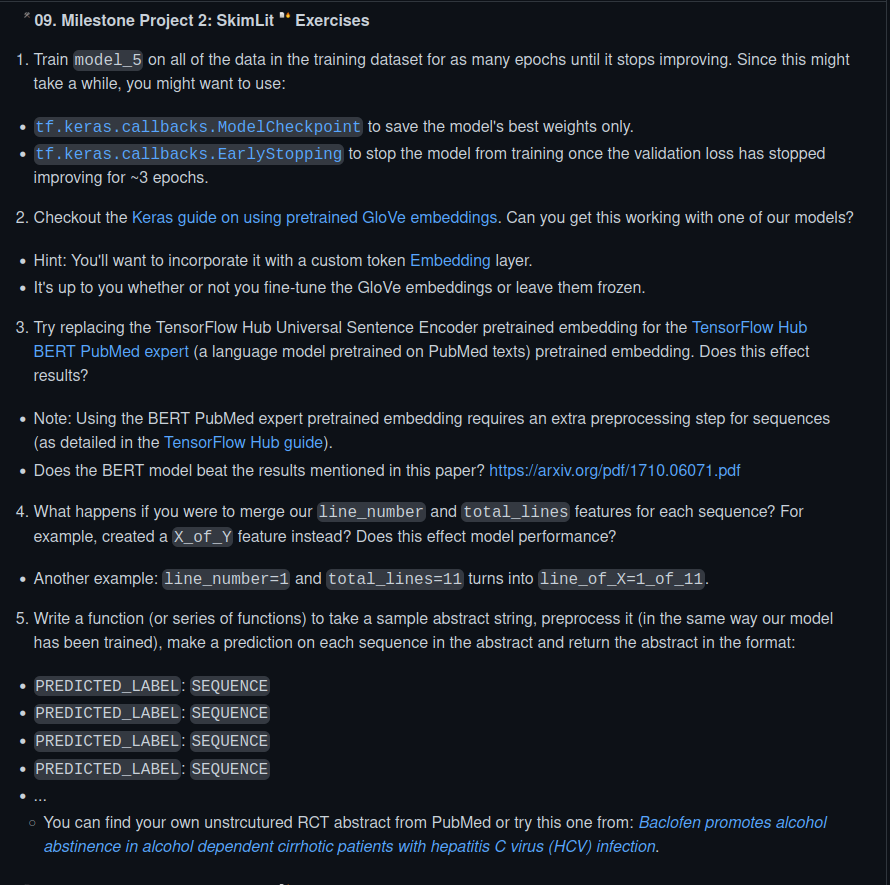


# Extra Resources


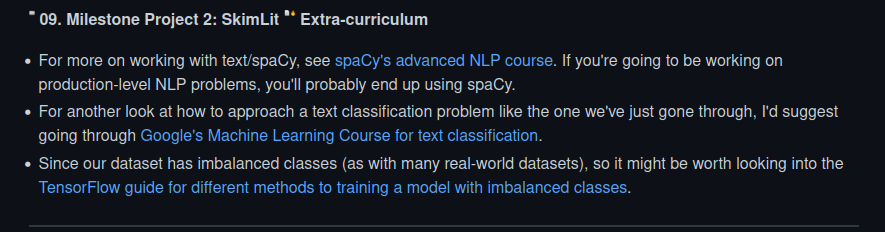

## Helper Functions

In [1]:
!wget https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py

--2022-08-31 12:20:37--  https://raw.githubusercontent.com/arghanath007/MachineLearning/main/Deep%20Learning/Transfer%20Learning/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22190 (22K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  21.67K  --.-KB/s    in 0.001s  

2022-08-31 12:20:37 (30.4 MB/s) - ‘helper_functions.py’ saved [22190/22190]



In [2]:
from helper_functions import unzip_data, plot_loss_curves, make_confusion_matrix, calculate_results, get_lines, preprocess_text_with_line_numbers

## Inputs

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import random
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.utils import plot_model

## Getting the data

In [4]:
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), done.
Checking out files: 100% (13/13), done.


In [5]:
data_dir='/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'
data_dir

'/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [6]:
import os
filenames= [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 '/content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt']

In [7]:
os.listdir(data_dir)

['dev.txt', 'test.txt', 'train.txt']

In [8]:
train_lines= get_lines(filenames[1])
len(train_lines), train_lines[:5]

(35135,
 ['###24845963\n',
  'BACKGROUND\tThis study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( ADHF ) .\n',
  'RESULTS\tA post hoc analysis was conducted with the use of data from the Evaluation Study of Congestive Heart Failure and Pulmonary Artery Catheterization Effectiveness ( ESCAPE ) .\n',
  'RESULTS\tLiver function tests ( LFTs ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .\n',
  'RESULTS\tSurvival analyses were used to assess the association between admission Model of End-Stage Liver Disease Excluding International Normalized Ratio ( MELD-XI ) scores and patient outcome.There was a high prevalence of abnormal baseline ( admission ) LFTs ( albumin @ % , aspartate transaminase @ % , alanine transaminase @ % , and total bilirubin @ % ) .\n'])

In [9]:
preprocess_text_with_line_numbers(filenames[1])[:5]

[{'target': 'BACKGROUND',
  'text': 'this study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure ( adhf ) .',
  'line_number': 0,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'a post hoc analysis was conducted with the use of data from the evaluation study of congestive heart failure and pulmonary artery catheterization effectiveness ( escape ) .',
  'line_number': 1,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'liver function tests ( lfts ) were measured at @ time points from baseline , at discharge , and up to @ months follow-up .',
  'line_number': 2,
  'total_lines': 8},
 {'target': 'RESULTS',
  'text': 'survival analyses were used to assess the association between admission model of end-stage liver disease excluding international normalized ratio ( meld-xi ) scores and patient outcome.there was a high prevalence of abnormal baseline ( admission ) lfts ( albumin @ % , aspartate transaminase @ %

### Processing the datasets

In [10]:
train_samples= preprocess_text_with_line_numbers(data_dir + "train.txt")
val_samples= preprocess_text_with_line_numbers(data_dir + "dev.txt")
test_samples= preprocess_text_with_line_numbers(data_dir + "test.txt")

In [11]:
train_samples[:1]

[{'target': 'OBJECTIVE',
  'text': 'to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
  'line_number': 0,
  'total_lines': 11}]

In [12]:
train_df= pd.DataFrame(train_samples)
val_df= pd.DataFrame(val_samples)
test_df= pd.DataFrame(test_samples)

In [13]:
train_df[:11]

,target,text,line_number,total_lines
0,OBJECTIVE,to investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,a total of @ patients with primary knee oa wer...,1,11
2,METHODS,outcome measures included pain reduction and i...,2,11
3,METHODS,pain was assessed using the visual analog pain...,3,11
4,METHODS,secondary outcome measures included the wester...,4,11
5,METHODS,"serum levels of interleukin @ ( il-@ ) , il-@ ...",5,11
6,RESULTS,there was a clinically relevant reduction in t...,6,11
7,RESULTS,the mean difference between treatment arms ( @...,7,11
8,RESULTS,"further , there was a clinically relevant redu...",8,11
9,RESULTS,these differences remained significant at @ we...,9,11


In [14]:
train_sentences= train_df['text'].tolist()
val_sentences= val_df['text'].tolist()
test_sentences= test_df['text'].tolist()

len(train_sentences), len(val_sentences), len(test_sentences)

(180040, 30212, 30135)

In [15]:
train_sentences[:5]

['to investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( oa ) .',
 'a total of @ patients with primary knee oa were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'secondary outcome measures included the western ontario and mcmaster universities osteoarthritis index scores , patient global assessment ( pga ) of the severity of knee oa , and @-min walk distance ( @mwd ) .']

### One Hot Encoder labels

In [16]:
one_hot_encoder= OneHotEncoder(sparse=False)

train_labels_one_hot= one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_one_hot= one_hot_encoder.transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_one_hot= one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))

train_labels_one_hot[:5], train_labels_one_hot.shape

(array([[0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 1., 0., 0.]]), (180040, 5))

### Label encode `The target labels` 

> Extract labels `target columns` and encode them into integers. Encoding the `string/text` into `numbers`

In [17]:
label_encoder= LabelEncoder()

train_labels_encoder= label_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
val_labels_encoder= label_encoder.fit_transform(val_df['target'].to_numpy().reshape(-1,1))
test_labels_encoder= label_encoder.fit_transform(test_df['target'].to_numpy().reshape(-1,1))

train_labels_encoder, train_labels_encoder.shape

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3, 2, 2, ..., 4, 1, 1]), (180040,))

### Class names and number of classes

In [18]:
num_classes= len(label_encoder.classes_)
class_names= label_encoder.classes_

num_classes, class_names

(5, array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

In [19]:
sent_lens = [len(sentence.split()) for sentence in train_sentences]
output_sequence_length= int(np.percentile(sent_lens, 95))
output_sequence_length

55

### Text Vectorizer

In [20]:
max_vocab_length= 68000 # Taken from `Table 2` of the paper
max_length= output_sequence_length

text_vectorizer= TextVectorization(
    max_tokens= max_vocab_length,
    output_sequence_length= max_length
)

text_vectorizer.adapt(train_sentences)

In [21]:
sample_text="I am currently learning doing the exercise of NLP or Natural Language Processing which is a part of Machine Learning."
text_vectorizer([sample_text])

<tf.Tensor: shape=(1, 55), dtype=int64, numpy=
array([[  389,  2651,  1325,   953, 10386,     2,   177,     4,     1,
           16,  2266,  2111,  2573,   126,    20,     8,   732,     4,
         9386,   953,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])>

In [22]:
len(text_vectorizer.get_vocabulary())

64841

In [23]:
rct_20K_vocab_length= len(text_vectorizer.get_vocabulary())
rct_20K_vocab_length

64841

In [24]:
max_vocab_length

68000

In [25]:
text_vectorizer.get_config()

{'name': 'text_vectorization',
 'trainable': True,
 'batch_input_shape': (None,),
 'dtype': 'string',
 'max_tokens': 68000,
 'standardize': 'lower_and_strip_punctuation',
 'split': 'whitespace',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 55,
 'pad_to_max_tokens': False,
 'sparse': False,
 'ragged': False,
 'vocabulary': None,
 'idf_weights': None}

### Embedding Layer

In [26]:
embedding= layers.Embedding(input_dim= rct_20K_vocab_length, output_dim= 128, mask_zero= True, name= "token_embedding")

#### Embedding Example

In [27]:
# Show example embedding
print(f"Sentence before vectorization:\n{sample_text}\n")
vectorized_sentence = text_vectorizer([sample_text])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = embedding(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
I am currently learning doing the exercise of NLP or Natural Language Processing which is a part of Machine Learning.

Sentence after vectorization (before embedding):
[[  389  2651  1325   953 10386     2   177     4     1    16  2266  2111
   2573   126    20     8   732     4  9386   953     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0]]

Sentence after embedding:
[[[-0.02839882  0.01750629  0.03776177 ... -0.01444525 -0.04193335
    0.02845499]
  [ 0.02761718  0.03769271  0.02622933 ...  0.00757815 -0.04723083
   -0.04048201]
  [ 0.00321096  0.02527434  0.04771637 ...  0.0358792  -0.01543755
   -0.02059116]
  ...
  [ 0.0118419  -0.04544276 -0.02832748 ...  0.03055995  0.01460921
    0.00743645]
  [ 0.0118419  -0.04544276 -0.02832748 ...  0.03055995  0.01460921
    0.00743645]
  [ 0.01184

## `1` Training the token_character_positional_features_tribrid_embeddings 
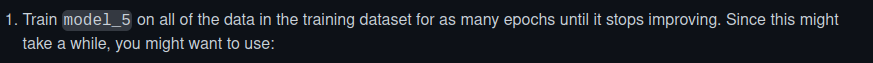

In [28]:
model_url='https://tfhub.dev/google/universal-sentence-encoder/4'

In [29]:
universal_sentence_encoder= hub.KerasLayer(model_url, trainable= False, input_shape=[], dtype="string", name="transfer_learning_USE")

### Character Datasets

In [30]:
def split_sentences(text):
  """
    Function to split text/sentences into characters

  """

  return " ".join(list(text))

In [31]:
train_characters= [split_sentences(sent) for sent in train_sentences]
val_characters= [split_sentences(sent) for sent in val_sentences]
test_characters= [split_sentences(sent) for sent in test_sentences]
train_characters[:5]

['t o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   o a   )   .',
 'a   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   o a   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .',
 'o u t c o m e   m e a s u r e s   i n c l u d e d   p a i n   r e d u c t i o n   a n d   i m p r o v e m e n t   i n   f u n c t i o n   s c o r e s   a 

In [32]:
import string
alphabet= string.ascii_lowercase + string.digits + string.punctuation
len(alphabet), alphabet

(68, 'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~')

In [33]:
char_lens= [len(sentence) for sentence in train_sentences]
np.percentile(char_lens, 95)

290.0

#### Custom Character level Token Vectorizer

In [34]:
NUM_CHAR_TOKENS= len(alphabet) + 2
output_seq_char_len= int(np.percentile(char_lens, 95))
character_vectorizer= TextVectorization(max_tokens=NUM_CHAR_TOKENS, output_sequence_length= output_seq_char_len, name='character_vectorizer')

character_vectorizer.adapt(train_characters)

In [35]:
random_train_chars = random.choice(train_characters)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = character_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
t h e   u s e   o f   n p   o v e r   s m d   i s   a   s a f e   a n d   e f f e c t i v e   a l t e r n a t i v e   a p p l i c a t i o n   t o   n p   t r e a t m e n t   f o r   p r e v e n t i n g   t h e   s k i n   s y m p t o m s   c a u s e d   b y   n p   w i t h o u t   i n t e r f e r i n g   w i t h   n i c o t i n e   a b s o r p t i o n   .

Length of chars: 150

Vectorized chars:
[[ 3 13  2 16  9  2  7 17  6 14  7 21  2  8  9 15 10  4  9  5  9  5 17  2
   5  6 10  2 17 17  2 11  3  4 21  2  5 12  3  2  8  6  5  3  4 21  2  5
  14 14 12  4 11  5  3  4  7  6  3  7  6 14  3  8  2  5  3 15  2  6  3 17
   7  8 14  8  2 21  2  6  3  4  6 18  3 13  2  9 23  4  6  9 19 15 14  3
   7 15  9 11  5 16  9  2 10 22 19  6 14 20  4  3 13  7 16  3  4  6  3  2
   8 17  2  8  4  6 18 20  4  3 13  6  4 11  7  3  4  6  2  5 22  9  7  8
  14  3  4  7  6  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

### Character Embeddings

In [36]:
character_embedding= layers.Embedding(input_dim= len(character_vectorizer.get_vocabulary()), output_dim=25, mask_zero=True, name="character_embeddings")

In [37]:
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = character_embedding(character_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
t h e   u s e   o f   n p   o v e r   s m d   i s   a   s a f e   a n d   e f f e c t i v e   a l t e r n a t i v e   a p p l i c a t i o n   t o   n p   t r e a t m e n t   f o r   p r e v e n t i n g   t h e   s k i n   s y m p t o m s   c a u s e d   b y   n p   w i t h o u t   i n t e r f e r i n g   w i t h   n i c o t i n e   a b s o r p t i o n   .

Embedded chars (after vectorization and embedding):
[[[ 0.01811371 -0.03960725  0.03564011 ...  0.03757802 -0.03285702
    0.03790599]
  [ 0.00700488  0.03568448  0.0078425  ...  0.03278866 -0.02443732
    0.01459703]
  [ 0.02643167  0.02931968 -0.03986912 ... -0.04012106 -0.02299705
    0.02656335]
  ...
  [ 0.03948328 -0.03709638 -0.01526441 ...  0.01000344 -0.00559989
    0.01316774]
  [ 0.03948328 -0.03709638 -0.01526441 ...  0.01000344 -0.00559989
    0.01316774]
  [ 0.03948328 -0.03709638 -0.01526441 ...  0.01000344 -0.00559989
    0.01316774]]]

Character embedding shape: (1

### Line Number

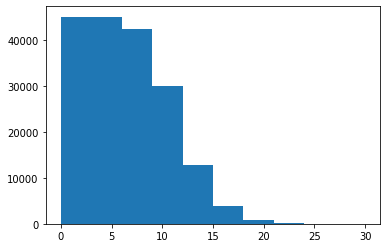

In [38]:
plt.hist(train_df['line_number']);

In [39]:
np.percentile(train_df['line_number'], 98)

15.0

### Line Number dataset

In [40]:
train_df_line_numbers= train_df["line_number"].to_numpy()
val_df_line_numbers= val_df["line_number"].to_numpy()
test_df_line_numbers= test_df["line_number"].to_numpy()

train_df_line_numbers, train_df_line_numbers.shape

(array([ 0,  1,  2, ...,  9, 10, 11]), (180040,))

In [41]:
train_df_line_numbers.dtype

dtype('int64')

### One Hot Encoded Line Number dataset

In [42]:
train_line_numbers_one_hot= tf.one_hot(train_df_line_numbers, depth=15)
val_line_numbers_one_hot= tf.one_hot(val_df_line_numbers, depth=15)
test_line_numbers_one_hot= tf.one_hot(test_df_line_numbers, depth=15)

train_line_numbers_one_hot, train_line_numbers_one_hot.shape

(<tf.Tensor: shape=(180040, 15), dtype=float32, numpy=
 array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 TensorShape([180040, 15]))

### Total Lines

(array([ 1393., 23102., 67507., 40551., 32807., 11026.,  2051.,  1223.,
          291.,    89.]),
 array([ 3. ,  5.7,  8.4, 11.1, 13.8, 16.5, 19.2, 21.9, 24.6, 27.3, 30. ]),
 <a list of 10 Patch objects>)

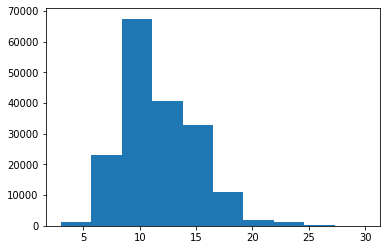

In [43]:
plt.hist(train_df['total_lines'])

In [44]:
np.percentile(train_df['total_lines'], 98)

20.0

### Total Lines dataset

In [45]:
train_df_total_lines= train_df["total_lines"].to_numpy()
val_df_total_lines= val_df["total_lines"].to_numpy()
test_df_total_lines= test_df["total_lines"].to_numpy()

train_df_total_lines, train_df_total_lines.shape

(array([11, 11, 11, ..., 11, 11, 11]), (180040,))

### One Hot Encoded Total Lines dataset

In [46]:
train_total_lines_one_hot= tf.one_hot(train_df_total_lines, depth=20)
val_total_lines_one_hot= tf.one_hot(val_df_total_lines, depth=20)
test_total_lines_one_hot= tf.one_hot(test_df_total_lines, depth=20)

train_total_lines_one_hot, train_total_lines_one_hot.shape

(<tf.Tensor: shape=(180040, 20), dtype=float32, numpy=
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>,
 TensorShape([180040, 20]))

## Building the `Tribrid Embedding model`

### `1` Token Inputs

In [47]:
token_inputs= layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings= universal_sentence_encoder(token_inputs)
token_outputs= layers.Dense(128, activation="relu")(token_embeddings)

token_model= tf.keras.Model(token_inputs, token_outputs, name="token_model")

### `2` Character Inputs

In [48]:
character_inputs= layers.Input(shape=(1, ), dtype="string", name="character_inputs")
character_vectors= character_vectorizer(character_inputs)
character_embeddings= character_embedding(character_vectors)
character_bi_lstm= layers.Bidirectional(layers.LSTM(24))(character_embeddings)
character_model= tf.keras.Model(character_inputs, character_bi_lstm, name="character_model")

### `3` Line Number Model

In [49]:
line_number_inputs= layers.Input(shape=(15,), dtype="float32", name="line_number_inputs")
dense_layer= layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model= tf.keras.Model(line_number_inputs, dense_layer, name= "line_number_model")

### `4` Total Lines Model

In [50]:
total_lines_input= layers.Input(shape=(20,), dtype="float32", name="total_lines_inputs")
dense_layer= layers.Dense(32, activation="relu")(total_lines_input)
total_lines_model= tf.keras.Model(total_lines_input, dense_layer, name="total_lines_model")

### `5` Combine Token and character Embeddings

In [51]:
combine_embeddings= layers.Concatenate(name="token_and_character_embeddings")([token_model.output, character_model.output])

dense_layer= layers.Dense(256, activation="relu")(combine_embeddings)
x= layers.Dropout(0.5, name="dropout_layer")(dense_layer)

### `6` Combine the positional embeddings with the `combine_embeddings` above i.e with `token and character embeddings`

In [52]:
tribrid_embeddings= layers.Concatenate(name="positional_features_with_token_and_character_embeddings")([line_number_model.output, total_lines_model.output, x])

### `7` Output layer for `Tribrid` model

In [53]:
output_layer= layers.Dense(num_classes, activation="softmax", name="output_layer_tribrid")(tribrid_embeddings)

### `8` Putting the model together

In [54]:
tribrid_model_whole= tf.keras.Model(inputs= [line_number_model.inputs, total_lines_model.input, token_model.input, character_model.input], outputs=output_layer, name="tribrid_embedding_model_5")

In [55]:
tribrid_model_whole.summary()

Model: "tribrid_embedding_model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 character_inputs (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 character_vectorizer (TextVect  (None, 290)         0           ['character_inputs[0][0]']       
 orization)                                                                                       
                                                                                                  
 transfer_learning_USE (KerasLa  (None, 512)         256797824   ['token_i

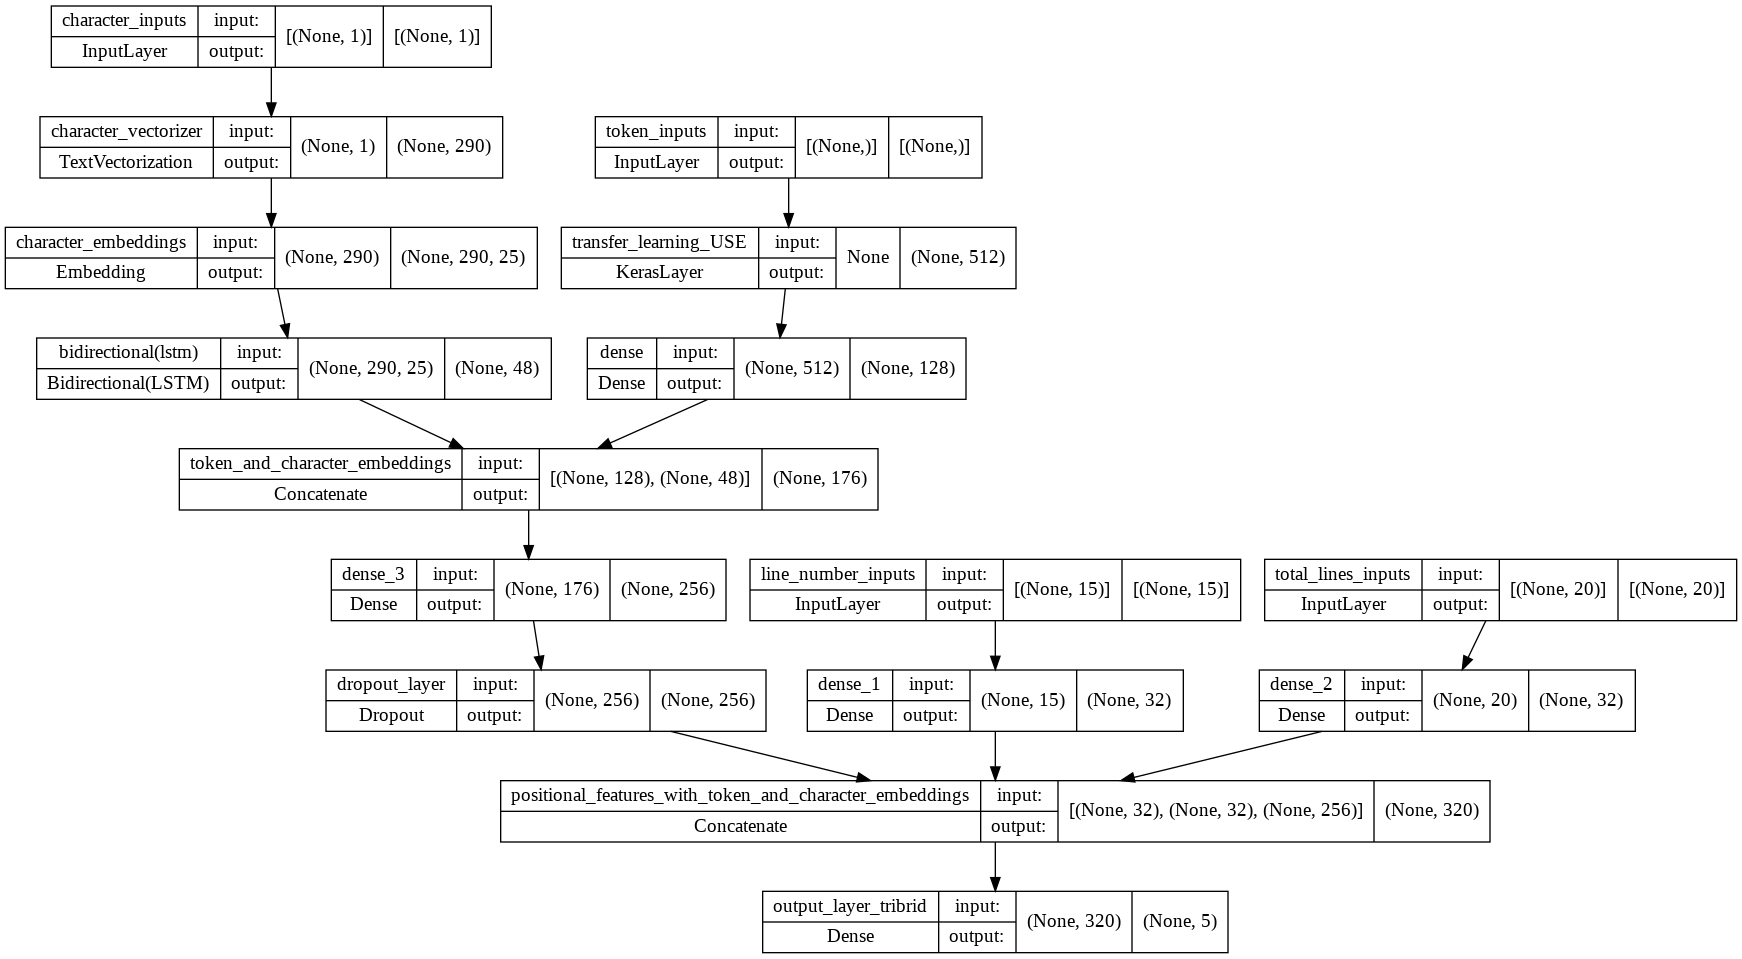

In [56]:
plot_model(tribrid_model_whole, show_shapes=True)

In [57]:
tribrid_model_whole.compile(loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

### Making datasets performant and load faster

In [58]:
train_line_total_token_char_data= tf.data.Dataset.from_tensor_slices((train_line_numbers_one_hot, train_total_lines_one_hot, train_sentences, train_characters)) # Data
train_line_total_token_char_labels= tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # Labels
train_line_total_token_char_dataset= tf.data.Dataset.zip((train_line_total_token_char_data, train_line_total_token_char_labels)) # Combining data and labels

train_line_total_token_char_dataset= train_line_total_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

val_line_total_token_char_data= tf.data.Dataset.from_tensor_slices((val_line_numbers_one_hot, val_total_lines_one_hot, val_sentences, val_characters))
val_line_total_token_char_labels= tf.data.Dataset.from_tensor_slices(val_labels_one_hot) 
val_line_total_token_char_dataset= tf.data.Dataset.zip((val_line_total_token_char_data, val_line_total_token_char_labels)) 

val_line_total_token_char_dataset= val_line_total_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


test_line_total_token_char_data= tf.data.Dataset.from_tensor_slices((test_line_numbers_one_hot, test_total_lines_one_hot, test_sentences, test_characters))
test_line_total_token_char_labels= tf.data.Dataset.from_tensor_slices(test_labels_one_hot) 
test_line_total_token_char_dataset= tf.data.Dataset.zip((test_line_total_token_char_data, test_line_total_token_char_labels)) 

test_line_total_token_char_dataset= test_line_total_token_char_dataset.batch(32).prefetch(tf.data.AUTOTUNE)



train_line_total_token_char_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 15), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

### Creating some useful callbacks

In [59]:
from helper_functions import model_check_point_callback, create_early_stopping_callback, create_tensorboard_callback, reduce_learning_rate_callback

In [60]:
model_checkpoint_path= 'checkpoints'
check_point_callback= model_check_point_callback(model_checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy')

dir_name= 'tensorboard'
tensorboard_callback= create_tensorboard_callback(dir_name, experiment_name="tribrid_embeddings_with_whole_training_dataset")

early_stopping_callback= create_early_stopping_callback(monitor="val_accuracy", patience=3)

reduce_lr_callback= reduce_learning_rate_callback(monitor="val_accuracy", factor=0.2, patience=2, minimum_lr= 1e-7)

Saving TensorBoard log files to: tensorboard/tribrid_embeddings_with_whole_training_dataset/20220831-122206


### Training the model with `trainable=False` in the pre-trained USE feature extractor model

In [61]:
history_tribrid_model_whole= tribrid_model_whole.fit(train_line_total_token_char_dataset, epochs=10, steps_per_epoch=len(train_line_total_token_char_dataset), validation_data=val_line_total_token_char_dataset, validation_steps=len(val_line_total_token_char_dataset), callbacks=[tensorboard_callback, check_point_callback, early_stopping_callback, reduce_lr_callback])

Epoch 1/10
5627/5627 [==============================] - ETA: 0s - loss: 0.9552 - accuracy: 0.8213
Epoch 1: val_accuracy improved from -inf to 0.84556, saving model to checkpoints
5627/5627 [==============================] - 329s 56ms/step - loss: 0.9552 - accuracy: 0.8213 - val_loss: 0.9108 - val_accuracy: 0.8456 - lr: 0.0010
Epoch 2/10
5627/5627 [==============================] - ETA: 0s - loss: 0.9099 - accuracy: 0.8529
Epoch 2: val_accuracy improved from 0.84556 to 0.85294, saving model to checkpoints
5627/5627 [==============================] - 298s 53ms/step - loss: 0.9099 - accuracy: 0.8529 - val_loss: 0.9001 - val_accuracy: 0.8529 - lr: 0.0010
Epoch 3/10
5627/5627 [==============================] - ETA: 0s - loss: 0.8972 - accuracy: 0.8625
Epoch 3: val_accuracy did not improve from 0.85294
5627/5627 [==============================] - 267s 47ms/step - loss: 0.8972 - accuracy: 0.8625 - val_loss: 0.8999 - val_accuracy: 0.8523 - lr: 0.0010
Epoch 4/10
5627/5627 [=====================

## Evaluating the model

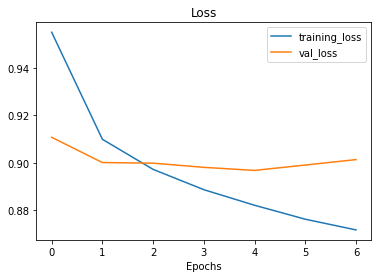

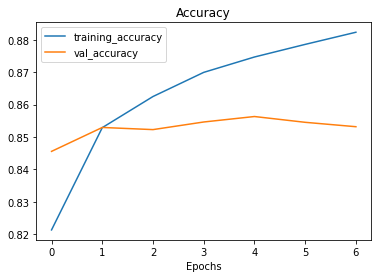

In [62]:
plot_loss_curves(history_tribrid_model_whole)

In [63]:
tribrid_model_whole_evaluate=tribrid_model_whole.evaluate(val_line_total_token_char_dataset)
tribrid_model_whole_evaluate

945/945 [==============================] - 20s 21ms/step - loss: 0.9014 - accuracy: 0.8532


[0.9013696908950806, 0.8531709313392639]

In [64]:
tribrid_model_whole_pred_probs= tribrid_model_whole.predict(val_line_total_token_char_dataset)
tribrid_model_whole_pred_probs

array([[0.6739873 , 0.09069538, 0.01682781, 0.19982685, 0.01866269],
       [0.53147054, 0.10114449, 0.08410595, 0.24286662, 0.04041241],
       [0.39117435, 0.08118795, 0.02649604, 0.44862464, 0.05251705],
       ...,
       [0.02230334, 0.05385294, 0.01239814, 0.02757957, 0.883866  ],
       [0.0188296 , 0.3185489 , 0.0467379 , 0.02725508, 0.58862853],
       [0.03345101, 0.87031376, 0.0424574 , 0.02172835, 0.03204942]],
      dtype=float32)

In [65]:
tribrid_model_whole_preds= tf.argmax(tribrid_model_whole_pred_probs, axis=1)
tribrid_model_whole_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 4, 1])>

In [66]:
tribrid_model_whole_results= calculate_results(val_labels_encoder, tribrid_model_whole_preds)
tribrid_model_whole_results

{'accuracy': 85.31709254600821,
 'precision': 0.8549809720318967,
 'recall': 0.8531709254600821,
 'f1': 0.8505483881895303}

## Conclusion

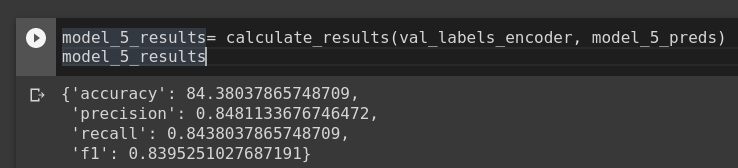

> This is the score the same model got when trained on `10%` of the dataset at every epoch of the model training. The model ran for `5` epochs only.

### Training the model with `trainable=True` as a Fine-Tuned model. The layers of the USE model are unfrozen.

In [67]:
universal_sentence_encoder_trainable= hub.KerasLayer(model_url, trainable= True, input_shape=[], dtype="string", name="transfer_learning_USE_fine_tuned")

In [68]:
# Token Embeddings

token_inputs= layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings= universal_sentence_encoder_trainable(token_inputs)
token_outputs= layers.Dense(128, activation="relu")(token_embeddings)

token_model= tf.keras.Model(token_inputs, token_outputs, name="token_model")

# Character Embeddings

character_inputs= layers.Input(shape=(1, ), dtype="string", name="character_inputs")
character_vectors= character_vectorizer(character_inputs)
character_embeddings= character_embedding(character_vectors)
character_bi_lstm= layers.Bidirectional(layers.LSTM(24))(character_embeddings)
character_model= tf.keras.Model(character_inputs, character_bi_lstm, name="character_model")

# Line Number feature

line_number_inputs= layers.Input(shape=(15,), dtype="float32", name="line_number_inputs")
dense_layer= layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model= tf.keras.Model(line_number_inputs, dense_layer, name= "line_number_model")

# Total Lines Feature

total_lines_input= layers.Input(shape=(20,), dtype="float32", name="total_lines_inputs")
dense_layer= layers.Dense(32, activation="relu")(total_lines_input)
total_lines_model= tf.keras.Model(total_lines_input, dense_layer, name="total_lines_model")

# Combining Token and Character Embeddings

combine_embeddings= layers.Concatenate(name="token_and_character_embeddings")([token_model.output, character_model.output])

dense_layer= layers.Dense(256, activation="relu")(combine_embeddings)
x= layers.Dropout(0.5, name="dropout_layer")(dense_layer)

# Combining the Engineered features(Line Number and Total Lines) with the token and character embeddings

tribrid_embeddings= layers.Concatenate(name="positional_features_with_token_and_character_embeddings_with_fine_tuning")([line_number_model.output, total_lines_model.output, x])

# Output layer of the Tribrid Model

output_layer= layers.Dense(num_classes, activation="softmax", name="output_layer_tribrid")(tribrid_embeddings)

# Putting the model together

tribrid_model_whole_fine_tuned= tf.keras.Model(inputs= [line_number_model.inputs, total_lines_model.input, token_model.input, character_model.input], outputs=output_layer, name="tribrid_embedding_fine_tuned_model")

In [69]:
tribrid_model_whole_fine_tuned.summary()

Model: "tribrid_embedding_fine_tuned_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 character_inputs (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 character_vectorizer (TextVect  (None, 290)         0           ['character_inputs[0][0]']       
 orization)                                                                                       
                                                                                                  
 transfer_learning_USE (KerasLa  (None, 512)         256797824   

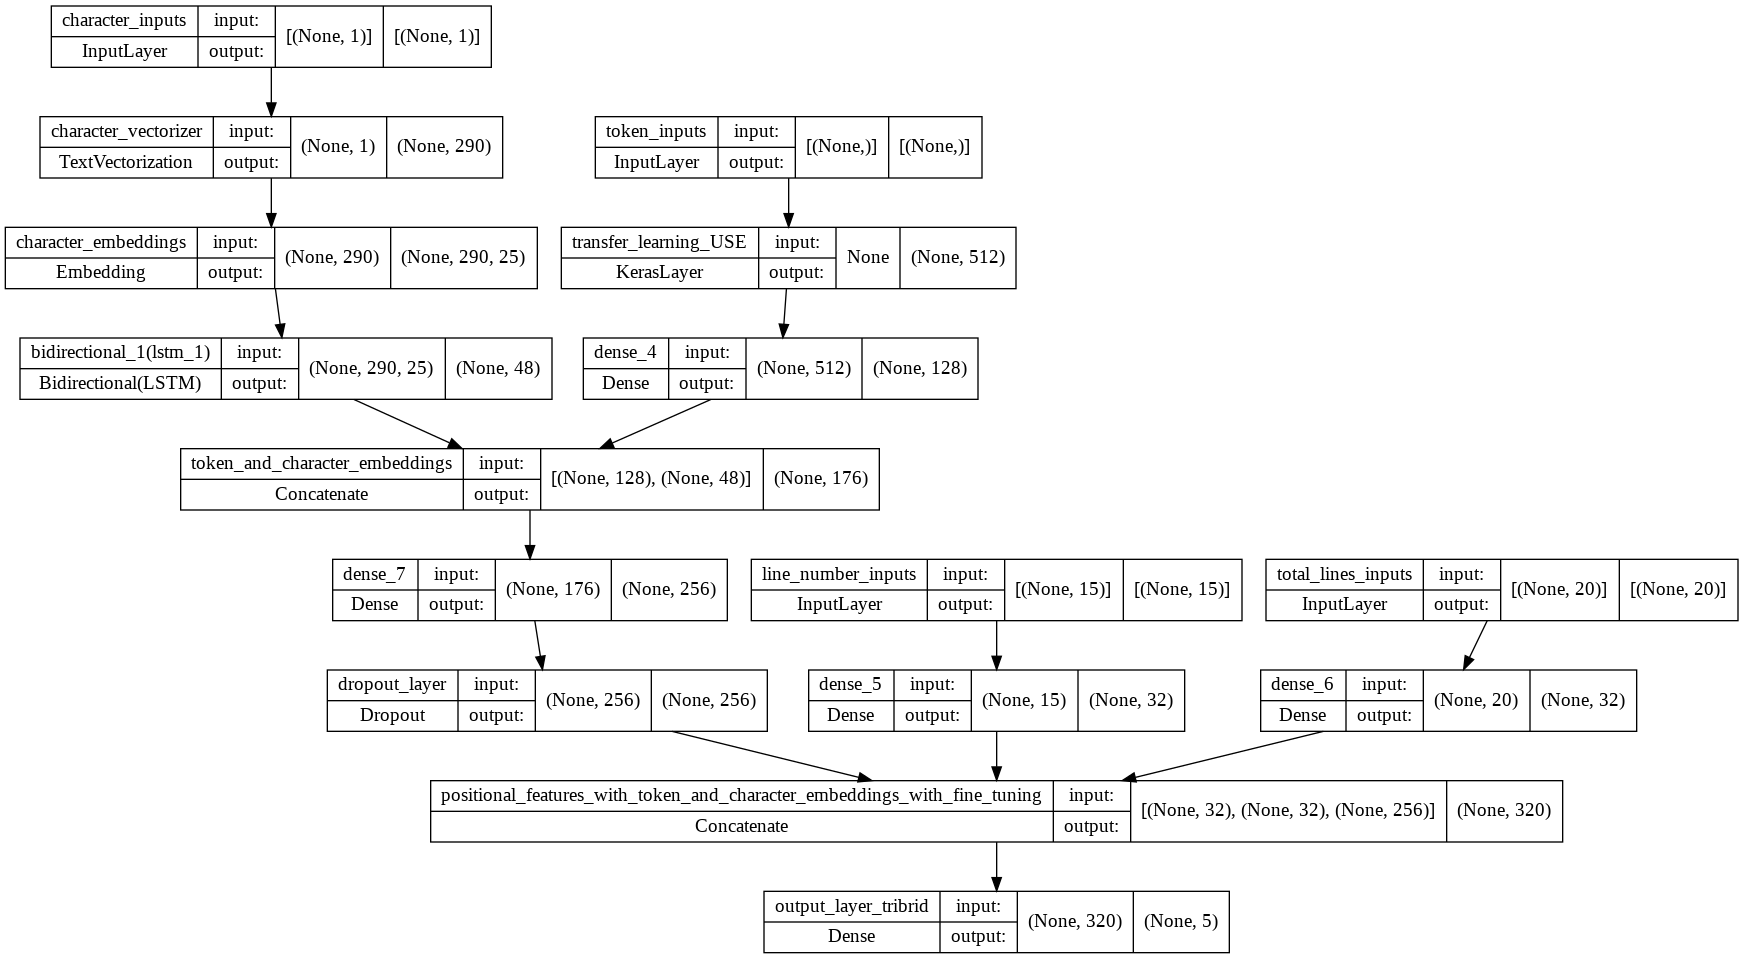

In [70]:
plot_model(tribrid_model_whole_fine_tuned, show_shapes=True)

In [71]:
tribrid_model_whole_fine_tuned.compile(loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy"])

### Callbacks for Fine-Tuned Model

In [74]:
model_checkpoint_path= 'checkpoints_fine_tuned'
check_point_callback= model_check_point_callback(model_checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy')

dir_name= 'tensorboard'
tensorboard_callback= create_tensorboard_callback(dir_name, experiment_name="tribrid_embeddings_with_whole_training_dataset_with_fine_tuning")

early_stopping_callback= create_early_stopping_callback(monitor="val_accuracy", patience=3)

reduce_lr_callback= reduce_learning_rate_callback(monitor="val_accuracy", factor=0.2, patience=2, minimum_lr= 1e-7)

Saving TensorBoard log files to: tensorboard/tribrid_embeddings_with_whole_training_dataset_with_fine_tuning/20220831-125728


In [75]:
history_tribrid_model_whole_fine_tuned= tribrid_model_whole_fine_tuned.fit(train_line_total_token_char_dataset, epochs=10, steps_per_epoch=len(train_line_total_token_char_dataset), validation_data=val_line_total_token_char_dataset, validation_steps=len(val_line_total_token_char_dataset), callbacks=[tensorboard_callback, check_point_callback, early_stopping_callback, reduce_lr_callback])

Epoch 1/10
5627/5627 [==============================] - ETA: 0s - loss: 0.9514 - accuracy: 0.8247
Epoch 1: val_accuracy improved from -inf to 0.84956, saving model to checkpoints_fine_tuned
5627/5627 [==============================] - 271s 48ms/step - loss: 0.9514 - accuracy: 0.8247 - val_loss: 0.9084 - val_accuracy: 0.8496 - lr: 0.0010
Epoch 2/10
5627/5627 [==============================] - ETA: 0s - loss: 0.9083 - accuracy: 0.8544
Epoch 2: val_accuracy improved from 0.84956 to 0.85545, saving model to checkpoints_fine_tuned
5627/5627 [==============================] - 268s 48ms/step - loss: 0.9083 - accuracy: 0.8544 - val_loss: 0.8984 - val_accuracy: 0.8555 - lr: 0.0010
Epoch 3/10
5627/5627 [==============================] - ETA: 0s - loss: 0.8955 - accuracy: 0.8638
Epoch 3: val_accuracy did not improve from 0.85545
5627/5627 [==============================] - 293s 52ms/step - loss: 0.8955 - accuracy: 0.8638 - val_loss: 0.8968 - val_accuracy: 0.8553 - lr: 0.0010
Epoch 4/10
5626/5627 

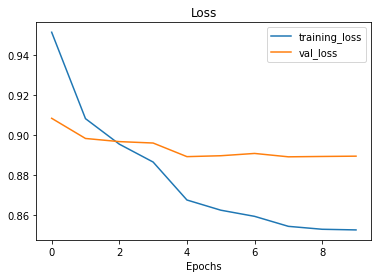

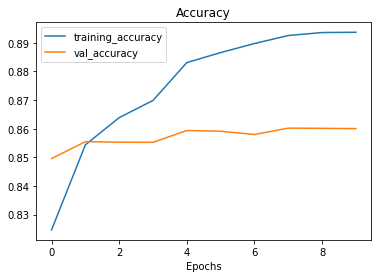

In [76]:
plot_loss_curves(history_tribrid_model_whole_fine_tuned)

In [77]:
tribrid_model_whole_fine_tuned_pred_probs= tribrid_model_whole_fine_tuned.predict(val_line_total_token_char_dataset)
tribrid_model_whole_fine_tuned_preds= tf.argmax(tribrid_model_whole_fine_tuned_pred_probs, axis=1)
tribrid_model_whole_fine_tuned_preds

<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [78]:
tribrid_model_whole_fine_tuned_results= calculate_results(val_labels_encoder, tribrid_model_whole_fine_tuned_preds)

In [79]:
tribrid_model_whole_results

{'accuracy': 85.31709254600821,
 'precision': 0.8549809720318967,
 'recall': 0.8531709254600821,
 'f1': 0.8505483881895303}

## The `optimizer` used in the paper was `SGD()` and I used `Adam()` instead as it was reliable and I was using it from the start.

> Let's try SGD() optimizer instead of Adam() and see if the score of the model improves or not. Using the `Fine-Tuned` model, with `trainable=True`.

In [80]:
# Token Embeddings

token_inputs= layers.Input(shape=[], dtype="string", name="token_inputs")
token_embeddings= universal_sentence_encoder_trainable(token_inputs)
token_outputs= layers.Dense(128, activation="relu")(token_embeddings)

token_model= tf.keras.Model(token_inputs, token_outputs, name="token_model")

# Character Embeddings

character_inputs= layers.Input(shape=(1, ), dtype="string", name="character_inputs")
character_vectors= character_vectorizer(character_inputs)
character_embeddings= character_embedding(character_vectors)
character_bi_lstm= layers.Bidirectional(layers.LSTM(24))(character_embeddings)
character_model= tf.keras.Model(character_inputs, character_bi_lstm, name="character_model")

# Line Number feature

line_number_inputs= layers.Input(shape=(15,), dtype="float32", name="line_number_inputs")
dense_layer= layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model= tf.keras.Model(line_number_inputs, dense_layer, name= "line_number_model")

# Total Lines Feature

total_lines_input= layers.Input(shape=(20,), dtype="float32", name="total_lines_inputs")
dense_layer= layers.Dense(32, activation="relu")(total_lines_input)
total_lines_model= tf.keras.Model(total_lines_input, dense_layer, name="total_lines_model")

# Combining Token and Character Embeddings

combine_embeddings= layers.Concatenate(name="token_and_character_embeddings")([token_model.output, character_model.output])

dense_layer= layers.Dense(256, activation="relu")(combine_embeddings)
x= layers.Dropout(0.5, name="dropout_layer")(dense_layer)

# Combining the Engineered features(Line Number and Total Lines) with the token and character embeddings

tribrid_embeddings= layers.Concatenate(name="positional_features_with_token_and_character_embeddings_with_fine_tuning_using_sgd")([line_number_model.output, total_lines_model.output, x])

# Output layer of the Tribrid Model

output_layer= layers.Dense(num_classes, activation="softmax", name="output_layer_tribrid")(tribrid_embeddings)

# Putting the model together

tribrid_model_whole_fine_tuned_using_sgd= tf.keras.Model(inputs= [line_number_model.inputs, total_lines_model.input, token_model.input, character_model.input], outputs=output_layer, name="tribrid_embedding_fine_tuned_model_using_sgd")

In [81]:
tribrid_model_whole_fine_tuned_using_sgd.summary()

Model: "tribrid_embedding_fine_tuned_model_using_sgd"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 character_inputs (InputLayer)  [(None, 1)]          0           []                               
                                                                                                  
 token_inputs (InputLayer)      [(None,)]            0           []                               
                                                                                                  
 character_vectorizer (TextVect  (None, 290)         0           ['character_inputs[0][0]']       
 orization)                                                                                       
                                                                                                  
 transfer_learning_USE_fine_tun  (None, 512)         25

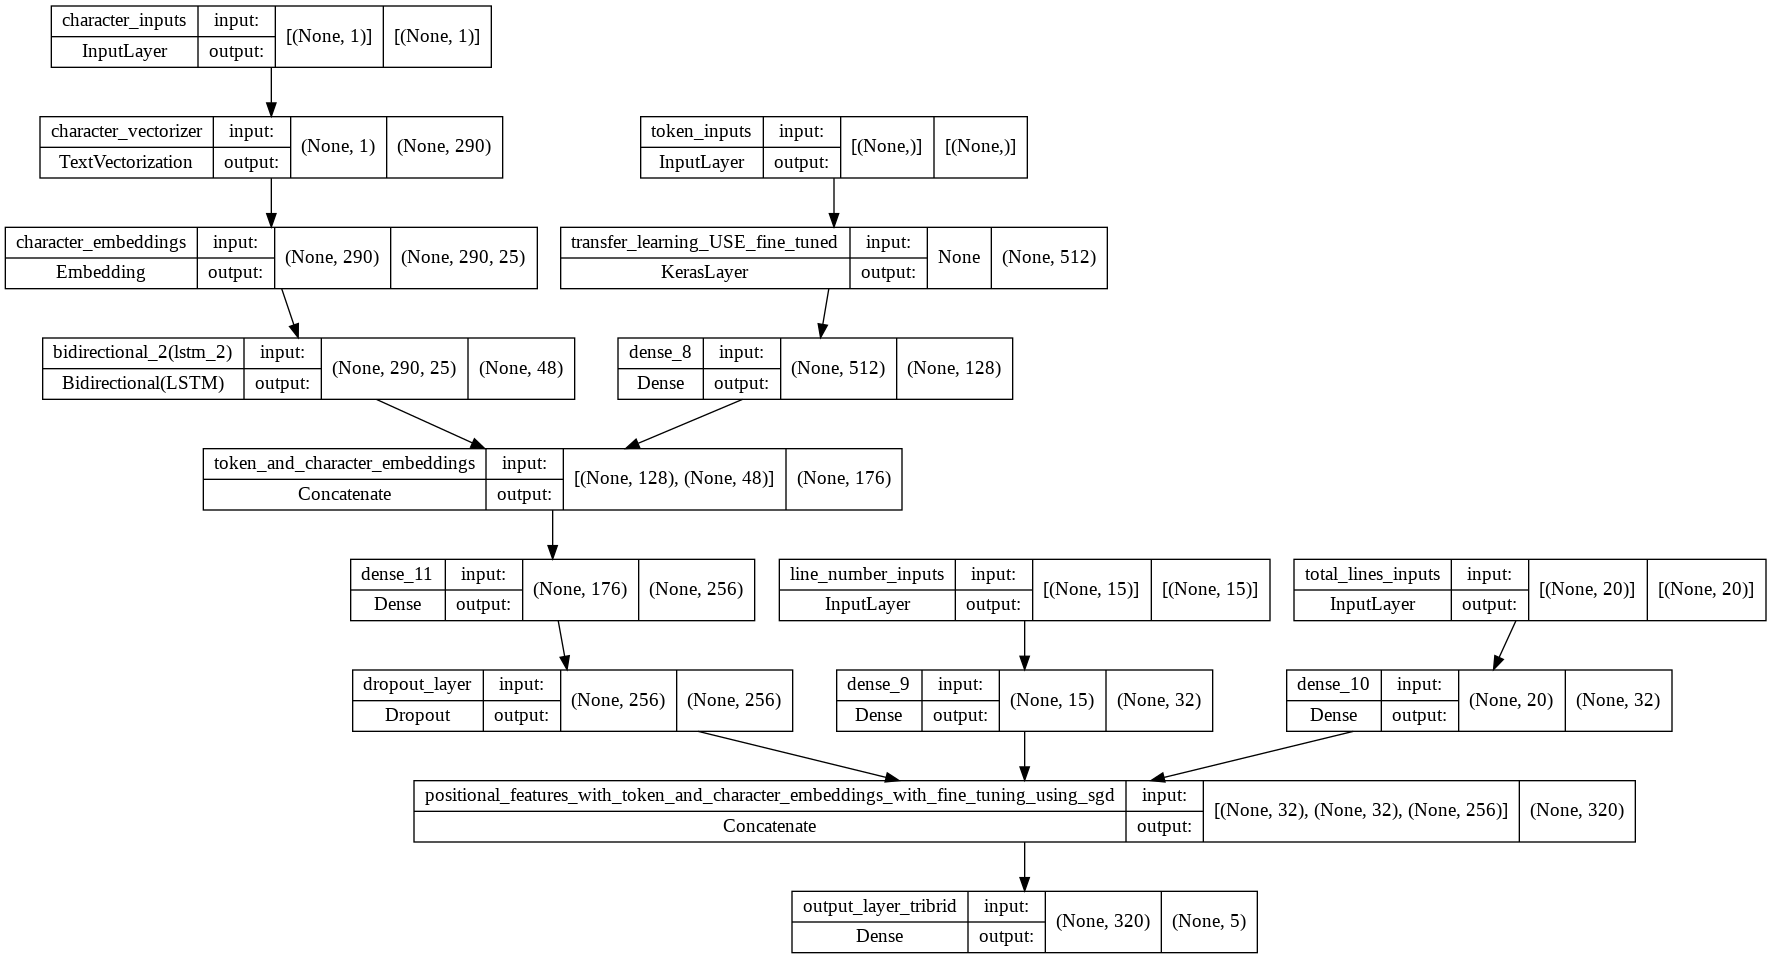

In [83]:
plot_model(tribrid_model_whole_fine_tuned_using_sgd, show_shapes=True)

In [84]:
tribrid_model_whole_fine_tuned_using_sgd.compile(loss= tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2), optimizer= tf.keras.optimizers.SGD(), metrics=["accuracy"])

### Callbacks for Fine-Tuned model using `SGD()` optimizer

In [85]:
model_checkpoint_path= 'checkpoints_fine_tuned_using_sgd'
check_point_callback= model_check_point_callback(model_checkpoint_path, save_weights_only=True, save_best_only=True, monitor='val_accuracy')

dir_name= 'tensorboard'
tensorboard_callback= create_tensorboard_callback(dir_name, experiment_name="tribrid_embeddings_with_whole_training_dataset_with_fine_tuning_using_sgd")

early_stopping_callback= create_early_stopping_callback(monitor="val_accuracy", patience=3)

reduce_lr_callback= reduce_learning_rate_callback(monitor="val_accuracy", factor=0.2, patience=2, minimum_lr= 1e-7)

Saving TensorBoard log files to: tensorboard/tribrid_embeddings_with_whole_training_dataset_with_fine_tuning_using_sgd/20220831-135156


In [ ]:
history_tribrid_model_whole_fine_tuned_using_sgd= tribrid_model_whole_fine_tuned_using_sgd.fit(train_line_total_token_char_dataset, epochs=10, steps_per_epoch=len(train_line_total_token_char_dataset), validation_data=val_line_total_token_char_dataset, validation_steps=len(val_line_total_token_char_dataset), callbacks=[tensorboard_callback, check_point_callback, early_stopping_callback, reduce_lr_callback])

In [ ]:
plot_loss_curves(history_tribrid_model_whole_fine_tuned_using_sgd)

In [ ]:
tribrid_model_whole_fine_tuned_using_sgd_pred_probs= tribrid_model_whole_fine_tuned_using_sgd.predict(val_line_total_token_char_dataset)
tribrid_model_whole_fine_tuned_using_sgd_preds= tf.argmax(tribrid_model_whole_fine_tuned_using_sgd_pred_probs, axis=1)
tribrid_model_whole_fine_tuned_using_sgd_preds

In [ ]:
tribrid_model_whole_fine_tuned_using_sgd_results= calculate_results(tribrid_model_whole_fine_tuned_using_sgd_preds, val_labels_encoder)
tribrid_model_whole_fine_tuned_using_sgd_results

In [ ]:
tribrid_model_whole_results

In [ ]:
tribrid_model_whole_fine_tuned_results

## The `optimizer` used in the paper was `SGD()` and I used `Adam()` instead as it was reliable and I was using it from the start.

> Let's try SGD() optimizer instead of Adam() and see if the score of the model improves or not. Using the `Feature Extractor` model, with `trainable=False`.

In [ ]:
universal_sentence_encoder

## Pre-trained Glove Embeddings

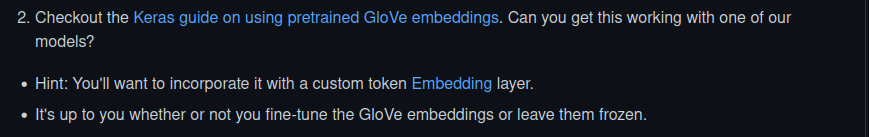

### Getting the Pre-trained Glove Embeddings

* Link -> https://keras.io/examples/nlp/pretrained_word_embeddings/

In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip

unzip_data('glove.6B.zip')

### Getting the paths of the glove embeddings

In [ ]:
glove_path= 'glove.6B.100d.1xt'

embedding_index={}

# Making a dictionary representation of the words(s -> [8,48...])

with open(glove_path) as f:
  for line in f:
    # Getting the words and coeffecients of the variable
    word, coefs= line.split(maxsplit=1)
    coefs= np.formstring(coefs, 'f', sep=' ')

    # Adding the coeffecient to the embedding dict
    embedding_index[word]= coefs

len(embedding_index)

### Getting the sentences and characters

In [ ]:
train_sentences= train_df['text'].tolist()
val_sentences= val_df['text'].tolist()

In [ ]:
train_chars= [split_sentences(sentence) for sentence in train_sentences]
val_chars= [split_sentences(sentence) for sentence in val_sentences]

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
text_vocab= text_vectorizer.get_vocabulary()
len(text_vocab)